<a href="https://colab.research.google.com/github/tinkercademy/ml-notebooks/blob/main/Data Science (Answers)/06_APIs_Answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# APIs

Before we jump into APIs, we need to talk about one more structure in Python that we haven't covered yet: <b>dictionaries</b>

## Dictionaries

Dictionaries are defined by curly brackets {} and consist of key:value pairs. We can look up a key, and find its value.

In [ ]:
#Dictionaries are denoted by squiggly brackets:
my_dictionary = {} #this creates an empty dictionary
my_dictionary['apple'] = '5'
my_dictionary['banana'] = '12'
my_dictionary['orange'] = '7'

my_dictionary

{'apple': '5', 'banana': '12', 'orange': '7'}

In [ ]:
#We can also create a new dictionary by using the dict() function
my_dictionary = dict() #this creates an empty dictionary
my_dictionary['apple'] = 5
my_dictionary['banana'] = 12
my_dictionary['orange'] = 7

my_dictionary

{'apple': 5, 'banana': 12, 'orange': 7}

In [ ]:
#We can also create a new dictionary in one line:
my_dictionary = {'apple':5, 'banana':12, 'orange':7}

my_dictionary

{'apple': 5, 'banana': 12, 'orange': 7}

In [ ]:
#Note that we cannot use indexing on a dictionary!

my_dictionary[0] #this gives an error

In [ ]:
#Instead we need to specify a key:

my_dictionary['banana']

12

<p><b>Interacting with Dictionaries</b></p>
Just creating dictionaries isn't enough. We want to be able to dynamically interact and update dictionary values. Just like strings, lists and dataframes, there are a number of ways we can interact and manipulate dictionaries.

In [ ]:
#We can update values
my_dictionary = {'apple':5, 'banana':12, 'orange':7}
my_dictionary['apple'] = 14

my_dictionary

{'apple': 14, 'banana': 12, 'orange': 7}

In [ ]:
#Delete key:value pairs using the 'del' keyword

del my_dictionary['banana']

my_dictionary

{'apple': 14, 'orange': 7}

In [ ]:
#Can print out using a loop:
for key in my_dictionary:
    print(key, ":", my_dictionary[key])

apple : 14
orange : 7


In [ ]:
# We can store any variable type as a value in a key-value pairs
my_dictionary = {}

#lists
my_dictionary['drinks'] = ['kopi', 'teh c', 'teh halia']

#booleans
my_dictionary['open'] = True

#even another dictionary
my_dictionary['fruit_stock'] = {'apple':17, 'orange':5, 'banana':18}

my_dictionary

{'drinks': ['kopi', 'teh c', 'teh halia'],
 'open': True,
 'fruit_stock': {'apple': 17, 'orange': 5, 'banana': 18}}

In [ ]:
# how can we access different values inside this dictionary?
my_dictionary.keys()

dict_keys(['drinks', 'open', 'fruit_stock'])

In [ ]:
my_dictionary["fruit_stock"]

{'apple': 17, 'orange': 5, 'banana': 18}

In [ ]:
my_dictionary["fruit_stock"]["banana"]

18

# APIs

#### Challenge:
We want to create a visualisation using live weather data. For this, we’ll use Particulate Matter 2.5 readings from data.gov.sg.

When we were using data.gov.sg data to plot using matplotlib, we downloaded a CSV file. But this requires manual interaction. Every time we want updated info, we have to manually go to the website and download the most recent CSV. Is there a way to automate this?

#### Intro to APIs

If I wanted to ask someone what the weather was, I might ask them "Hey, what's the weather today?" or "How’s the weather?" or "Is it hot today?" and you’d know I’m asking about the weather.

But computers talk to one another in a slightly different way: by exchanging data in nicely-formatted data packets.  These have to be properly formatted so that computers can recognise them, just like with your Python syntax. As a result, we need to be very specific when sending requests to computers. It also means that they're going to send responses in very specific formats.

(See slides for more info!)






Some notes on APIs:

* Computers that are online--servers--can choose what information they want to provide.
* Servers can require registration and user access keys, to identify and protect against unwanted behaviour.
* The information can be requested through a series of "calls", e.g. "hey, can I have the weather today in Singapore?"
* The information provided should be in a format recognisable to both ends, e.g. "31 degrees Celsius, sunny conditions" or "31, sunny".
* Often, the request is through a URL, e.g. `getweather.com/request/singapore/today`
* Often, the reply is in pre-formatted XML or JSON, e.g. `{temperature: 31, condition: sunny}`

This request-reply mechanism is known as an API, an **Application Programming Interface**. Lots and lots of services provide APIs, so that people can make things with them, e.g.

* [Google Maps APIs](https://developers.google.com/maps/) for people to make property price mashups
* [Singapore Government APIs](https://www.data.gov.sg) for public information the government wants to share
* [Facebook APIs](https://developers.facebook.com/) so you can build off people's social networks
* [Chuck Norris API](https://github.com/chucknorris-io/chuck-api) so... umm. We don't know why this exists.


In [ ]:
# Import the modules
import pandas as pd
import urllib.request
import json

# Create a request
url = "https://api.data.gov.sg/v1/environment/pm25?date=2018-01-24"
request = urllib.request.Request(url)

# request is an object with various methods/attributes
#request.add_header('api-key', 'BS2mysYRPHmA52SUlZW9G9kHdDKN3rBS')

# Get the response and store it
response = urllib.request.urlopen(request)

# response is also an object with various methods/attributes
data = response.read()

# Convert it to a Python dictionary
parsed_json = json.loads(data.decode('utf-8'))

#print out the result
parsed_json

{'region_metadata': [{'name': 'west',
   'label_location': {'latitude': 1.35735, 'longitude': 103.7}},
  {'name': 'east',
   'label_location': {'latitude': 1.35735, 'longitude': 103.94}},
  {'name': 'central',
   'label_location': {'latitude': 1.35735, 'longitude': 103.82}},
  {'name': 'south',
   'label_location': {'latitude': 1.29587, 'longitude': 103.82}},
  {'name': 'north',
   'label_location': {'latitude': 1.41803, 'longitude': 103.82}}],
 'items': [{'timestamp': '2018-01-24T01:00:00+08:00',
   'update_timestamp': '2018-01-24T01:06:19+08:00',
   'readings': {'pm25_one_hourly': {'west': 6,
     'east': 9,
     'central': 7,
     'south': 6,
     'north': 8}}},
  {'timestamp': '2018-01-24T02:00:00+08:00',
   'update_timestamp': '2018-01-24T02:06:18+08:00',
   'readings': {'pm25_one_hourly': {'west': 4,
     'east': 16,
     'central': 8,
     'south': 12,
     'north': 12}}},
  {'timestamp': '2018-01-24T03:00:00+08:00',
   'update_timestamp': '2018-01-24T03:06:17+08:00',
   'readin

#### Working with Dictionaries

In [ ]:
# If we have a complicated dictionary, how can we go about deciphering it?

parsed_json.keys()

dict_keys(['region_metadata', 'items', 'api_info'])

In [ ]:
parsed_json["api_info"]

{'status': 'healthy'}

In [ ]:
parsed_json["region_metadata"] # this is a list of dictionaries

[{'name': 'west', 'label_location': {'latitude': 1.35735, 'longitude': 103.7}},
 {'name': 'east',
  'label_location': {'latitude': 1.35735, 'longitude': 103.94}},
 {'name': 'central',
  'label_location': {'latitude': 1.35735, 'longitude': 103.82}},
 {'name': 'south',
  'label_location': {'latitude': 1.29587, 'longitude': 103.82}},
 {'name': 'north',
  'label_location': {'latitude': 1.41803, 'longitude': 103.82}}]

In [ ]:
print(parsed_json["items"])

[{'timestamp': '2018-01-24T01:00:00+08:00', 'update_timestamp': '2018-01-24T01:06:19+08:00', 'readings': {'pm25_one_hourly': {'west': 6, 'east': 9, 'central': 7, 'south': 6, 'north': 8}}}, {'timestamp': '2018-01-24T02:00:00+08:00', 'update_timestamp': '2018-01-24T02:06:18+08:00', 'readings': {'pm25_one_hourly': {'west': 4, 'east': 16, 'central': 8, 'south': 12, 'north': 12}}}, {'timestamp': '2018-01-24T03:00:00+08:00', 'update_timestamp': '2018-01-24T03:06:17+08:00', 'readings': {'pm25_one_hourly': {'west': 6, 'east': 11, 'central': 11, 'south': 18, 'north': 13}}}, {'timestamp': '2018-01-24T04:00:00+08:00', 'update_timestamp': '2018-01-24T04:06:18+08:00', 'readings': {'pm25_one_hourly': {'west': 10, 'east': 7, 'central': 6, 'south': 14, 'north': 6}}}, {'timestamp': '2018-01-24T05:00:00+08:00', 'update_timestamp': '2018-01-24T05:01:17+08:00', 'readings': {'pm25_one_hourly': {'west': 4, 'east': 9, 'central': 4, 'south': 5, 'north': 6}}}, {'timestamp': '2018-01-24T06:00:00+08:00', 'update

In [ ]:
#for item in parsed_json["items"]:
#    print(item)

#this is a list of dictionaries
#each dictionary has 3 keys:
#  - timestamp
#  - update_timestamp
#  - readings (whose value is another dictionary)

In [ ]:
len(parsed_json["items"])

23

In [ ]:
#How to read one of these readings?

parsed_json["items"][0]["readings"]

{'pm25_one_hourly': {'west': 6,
  'east': 9,
  'central': 7,
  'south': 6,
  'north': 8}}

In [ ]:
#How to read a single location in one of these readings?

parsed_json["items"][0]["readings"]["pm25_one_hourly"]["east"]

9

#### Try it out:
Can you find the average of the PM25 hourly readings in the South on Dec 31, 2017?

In [ ]:
#Hint:
#    Step 1: Get all the south readings for 31 Dec
#    Step 2: Average them

In [ ]:
for dictionary in parsed_json["items"]:
    print(dictionary["readings"]["pm25_one_hourly"]["south"])

6
12
18
14
5
5
6
7
2
5
6
11
9
4
21
9
30
35
3
4
5
2
3


In [ ]:
total = 0.0
for item in parsed_json["items"]:
    total += item["readings"]["pm25_one_hourly"]["south"]
total/len(parsed_json["items"])

9.652173913043478

In [ ]:
#You can also do this on a single line...

print(sum(item["readings"]["pm25_one_hourly"]["south"] for item in json.loads(urllib.request.urlopen(urllib.request.Request("https://api.data.gov.sg/v1/environment/pm25?date=2017-12-31")).read().decode('utf-8'))["items"]) / len(parsed_json["items"]))

#...but don't!

7.0


### <font color="red">Bonus Exercise:</font>

Can you convert the JSON data into a dataframe so that it's easier to work with? Let's assume we only care about the timestamps and the PM2.5 readings for the 5 regions at each timestamp.


In [ ]:
# The easiest way is to use pd.json_normalize()
df = pd.json_normalize(parsed_json["items"])

#optionally clean the dataframe a bit
df["timestamp"] = df["timestamp"].str[11:19]
df = df.set_index("timestamp")
del df["update_timestamp"]
df.columns = ["West", "East", "Central", "South", "North"]

df

,West,East,Central,South,North
timestamp,,,,,
01:00:00,6,9,7,6,8
02:00:00,4,16,8,12,12
03:00:00,6,11,11,18,13
04:00:00,10,7,6,14,6
05:00:00,4,9,4,5,6
06:00:00,9,16,6,5,10
07:00:00,4,17,4,6,9
08:00:00,5,12,6,7,12
09:00:00,4,7,5,2,7


In [ ]:
# Alternatively, we could use pd.DataFrame() to force a dictionary into a dataframe
# Here's an example of putting one row into a dataframe (full code below):
pd.DataFrame(parsed_json["items"][0]["readings"])

,pm25_one_hourly
central,7
east,9
north,8
south,6
west,6


In [ ]:
# 1. Create an empty dataframe   (no need to specify columns, they will be added auto)
#    hint: use pd.DataFrame()
data = pd.DataFrame()

# 2. First try to append a single hour of data
#  - get the JSON data into a dataframe
#  - append it

#how to know which item to convert to dataframe? try and print each:
pd.DataFrame(parsed_json["items"]) #not great
pd.DataFrame(parsed_json["items"][0]) #same as before just a single hour of data
pd.DataFrame(parsed_json["items"][0]["readings"]) #ooh this one looks nice
pd.DataFrame(parsed_json["items"][0]["readings"]).T #let's transpose it

# 3. Now append all 23 hours of data
for dictionary in parsed_json["items"]:
    tempdf = pd.DataFrame(dictionary["readings"]).T
    tempdf.index = [dictionary["timestamp"][11:19]]
    data = data.append(tempdf)

data

<ipython-input-26-77d3f7f99330>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tempdf)
<ipython-input-26-77d3f7f99330>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tempdf)
<ipython-input-26-77d3f7f99330>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tempdf)
<ipython-input-26-77d3f7f99330>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tempdf)
<ipython-input-26-77d3f7f99330>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tempdf)
<ipython-i

,central,east,north,south,west
01:00:00,7,9,8,6,6
02:00:00,8,16,12,12,4
03:00:00,11,11,13,18,6
04:00:00,6,7,6,14,10
05:00:00,4,9,6,5,4
06:00:00,6,16,10,5,9
07:00:00,4,17,9,6,4
08:00:00,6,12,12,7,5
09:00:00,5,7,7,2,4
10:00:00,6,13,11,5,10


<Axes: >

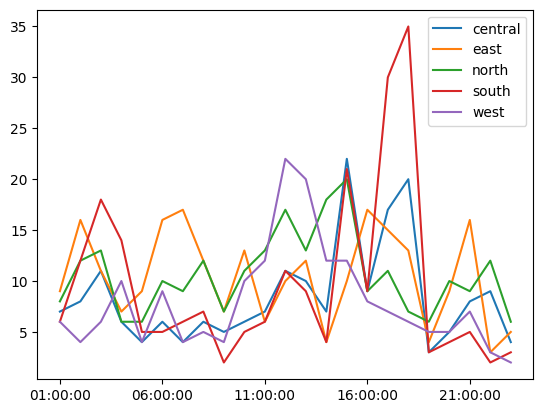

In [ ]:
%matplotlib inline
data.plot()

## Putting It All Together - APIs, Plot.ly, and Mapbox

1. Request the latest Particulate Matter 2.5 readings from data.gov.sg. Store the returned data in a python dictionary (hint: don’t specify a date to get current data)

2. Plot the longitude and latitude coordinates of the five locations on a map of Singapore using Plotly and Mapbox. (Your code should read the longitude and latitude coordinates directly from the response data; coordinates should not be hardcoded.)

3. Add hover text that displays:
    - the location name (north, east, central, etc.)
    - the current PM reading for that location.


In [ ]:
#Break it down into steps:
# 1. Access the CURRENT PM2.5 data from data.gov, save in parsed_json
# 2. get the long/lat coordinates for each weather station
# 3. get the current PM2.5 values for each weather station
# 4. import plotly/mapbox tools and pass all the data to plotly

In [ ]:
###Part 1
#Import the modules
import urllib.request
import json
import plotly
import plotly.graph_objs as go

# This is my own mapbox api key. Please sign up and get your own if you want to use it more extensively!
mapbox_access_token = 'pk.eyJ1IjoibWlrZXRpbmtlcnRhbmtlciIsImEiOiJjajZvajA2bWEwNXhxMzNud2NlMHUyaHI0In0.XFNKTNUWWVK-OO_r1kvXqQ'


#Create a request
url = "https://api.data.gov.sg/v1/environment/pm25" #don't specify a date to get current data
request = urllib.request.Request(url)

# Get the feed and store it
response = urllib.request.urlopen(request)
livedata = response.read()

# Convert it to a Python dictionary
parsed_json = json.loads(livedata.decode('utf-8'))

#first get long,lat coords

#west
west_long = parsed_json["region_metadata"][0]["label_location"]["longitude"]
west_lat = parsed_json["region_metadata"][0]["label_location"]["latitude"]

#east
east_long = parsed_json["region_metadata"][1]["label_location"]["longitude"]
east_lat = parsed_json["region_metadata"][1]["label_location"]["latitude"]

#central
central_long = parsed_json["region_metadata"][2]["label_location"]["longitude"]
central_lat = parsed_json["region_metadata"][2]["label_location"]["latitude"]

#south
south_long = parsed_json["region_metadata"][3]["label_location"]["longitude"]
south_lat = parsed_json["region_metadata"][3]["label_location"]["latitude"]

#north
north_long = parsed_json["region_metadata"][4]["label_location"]["longitude"]
north_lat = parsed_json["region_metadata"][4]["label_location"]["latitude"]

west_pm = parsed_json["items"][0]["readings"]["pm25_one_hourly"]["west"]
east_pm = parsed_json["items"][0]["readings"]["pm25_one_hourly"]["east"]
central_pm = parsed_json["items"][0]["readings"]["pm25_one_hourly"]["central"]
south_pm = parsed_json["items"][0]["readings"]["pm25_one_hourly"]["south"]
north_pm = parsed_json["items"][0]["readings"]["pm25_one_hourly"]["north"]

firstplot = go.Scattermapbox(
        lat=[north_lat, east_lat, south_lat, west_lat, central_lat],
        lon=[north_long, east_long, south_long, west_long, central_long],
        mode='markers',
        marker=dict(size=14),
        ### Part 3
        text=['North PM2.5 = ' + str(north_pm),
              'East PM2.5 = ' + str(east_pm),
              'South PM2.5 = ' + str(south_pm),
              'West PM2.5 = ' + str(west_pm),
              'Central PM2.5 = ' + str(central_pm),])

data = [firstplot]

layout = go.Layout(
    autosize=True,
    hovermode='closest',
    mapbox={'accesstoken': mapbox_access_token,
            'bearing':0,
            'center':{'lat':central_lat, 'lon':central_long},
            'pitch':0,
            'zoom':10}
)

#plotly.offline.plot(final_dictionary, filename='PM25.html')
go.Figure(data=data, layout=layout).show()

In [ ]:
#ALTERNATIVE SOLUTION: using loops and dictionaries
#                      instead of manually grabbing individual data

###Part 1
#Import the modules
import urllib.request
import json
import plotly
import plotly.graph_objs as go

# This is my own mapbox api key. Please sign up and get your own if you want to use it more extensively!
mapbox_access_token = 'pk.eyJ1IjoibWlrZXRpbmtlcnRhbmtlciIsImEiOiJjajZvajA2bWEwNXhxMzNud2NlMHUyaHI0In0.XFNKTNUWWVK-OO_r1kvXqQ'

#Create a request
url = "https://api.data.gov.sg/v1/environment/pm25" #don't specify a date to get current data
request = urllib.request.Request(url)

# Get the feed and store it
response = urllib.request.urlopen(request)
livedata = response.read()

# Convert it to a Python dictionary
parsed_json = json.loads(livedata.decode('utf-8'))

#first get, long,lat coords
coords = {}
for dictionary in parsed_json["region_metadata"]:
    coords[dictionary["name"]] = [dictionary["label_location"]["longitude"],
                                  dictionary["label_location"]["latitude"]]

pm25_values = {}
temp_dictionary = parsed_json["items"][0]["readings"]["pm25_one_hourly"]
for key in temp_dictionary:
    pm25_values[key] = temp_dictionary[key]

import plotly
import plotly.graph_objs as go

firstplot = go.Scattermapbox(
        lat=[coords["north"][1],
             coords["east"][1],
             coords["south"][1],
             coords["west"][1],
             coords["central"][1]],
        lon=[coords["north"][0],
             coords["east"][0],
             coords["south"][0],
             coords["west"][0],
             coords["central"][0]],
        mode='markers',
        marker=dict(size=14),
        ### Part 3
        text=['North PM2.5 = ' + str(pm25_values["north"]),
              'East PM2.5 = ' + str(pm25_values["east"]),
              'South PM2.5 = ' + str(pm25_values["south"]),
              'West PM2.5 = ' + str(pm25_values["west"]),
              'Central PM2.5 = ' + str(pm25_values["central"]),])

data = [firstplot]

layout = go.Layout(
    autosize=True,
    hovermode='closest',
    mapbox={'accesstoken': mapbox_access_token,
            'bearing':0,
            'center':{'lat':coords["central"][1], 'lon':coords["central"][0]},
            'pitch':0,
            'zoom':10}
)

#plotly.offline.plot(dict(data=data, layout=layout), filename='PM25.html')
go.Figure(data=data, layout=layout).show()

## Stock APIs

This exercise will go through the following:

* Reading financial data from online sources
* Basic dataframe and series manipulation
* Basic plotting
* Exporting to Excel

In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline


## DataReader

Pandas has it's own **DataReader** function, from the **`pandas_datareader`** module, which makes it easy to read data (e.g. historical stock price data) from the following online sources, and to save them as DataFrames:

* Yahoo Finance _(only allows user downloads, not automated requests)_
* Google Finance _(discontinued as of Sept 2017)_
* St.Louis FED (FRED)
* World Bank
* Enigma
* Quandl        
* Kenneth French’s data library
* OECD
* Eurostat
* Thrift Savings Plan
* Nasdaq Trader symbol definitions
* Alpha

More information, including tutorials to access each of these sites, can be found at the [pandas documentation page](https://pandas.pydata.org/docs/).

The downsides, however, are that:
* many of these sites have been changing and no longer offer data (for example, Yahoo and Google both recently shut down their APIs)
* sites return different formats of data of varying levels of completeness.
* it requires you to install the pandas-datareader module

There are actually a lot of different modules that individuals have written and posted online. Oftentimes they're looking for an easy way to grab stock data for their own means and share their resulting code on github. These code snippets can be really useful! But they might not be maintained, and they could have specifically tailored solutions that might not be relevant to you.

Because pandas-datareader requires an extra install, and requires learning additional functions, we're not going to use that method (but know that it exists if you're interested in it!). Instead, we're going to use a free stock info service called Alpha Vantage (https://www.alphavantage.co/). You can get a free API key which allows you to access their stock info. They return data as either a downloadable CSV, or JSON format (just like data.gov.sg!).

Example usage can be found at: https://www.alphavantage.co/documentation/

Here, we'll start by reading Microsoft stock prices for the past two weeks.

In [ ]:
# Import the modules
import urllib.request
import json
# Create a request
url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&outputsize=full&apikey=H74WYZ182MDD0055"
request = urllib.request.Request(url)

# Get the response and store it
response = urllib.request.urlopen(request)
# response is also an object with various methods/attributes
data = response.read()
# Convert it to a Python dictionary
parsed_json = json.loads(data.decode('utf-8'))

#print out the result:
#parsed_json

In [ ]:
#Sometimes pd.json_normalize() doesn't work nicely, for example:
pd.json_normalize(parsed_json["Time Series (Daily)"])

,2023-08-28.1. open,2023-08-28.2. high,2023-08-28.3. low,2023-08-28.4. close,2023-08-28.5. volume,2023-08-25.1. open,2023-08-25.2. high,2023-08-25.3. low,2023-08-25.4. close,2023-08-25.5. volume,...,1999-11-02.1. open,1999-11-02.2. high,1999-11-02.3. low,1999-11-02.4. close,1999-11-02.5. volume,1999-11-01.1. open,1999-11-01.2. high,1999-11-01.3. low,1999-11-01.4. close,1999-11-01.5. volume
0,325.6600,326.1500,321.7220,323.7000,14808482,321.4700,325.3600,318.8001,322.9800,21684104,...,92.7500,94.5000,91.9400,92.5600,23174500,93.2500,94.1900,92.1200,92.3700,26630600


In [ ]:
#Instead we can try to force the data into a dataframe to see if it is any better
data1 = pd.DataFrame(parsed_json["Time Series (Daily)"]).T
data1

,1. open,2. high,3. low,4. close,5. volume
2023-08-28,325.6600,326.1500,321.7220,323.7000,14808482
2023-08-25,321.4700,325.3600,318.8001,322.9800,21684104
2023-08-24,332.8500,332.9800,319.9600,319.9700,23281434
2023-08-23,323.8200,329.2000,323.4600,327.0000,21166382
2023-08-22,325.5000,326.0750,321.4600,322.4600,16102024
...,...,...,...,...,...
1999-11-05,91.8100,92.8700,90.5000,91.5600,35083700
1999-11-04,92.3100,92.7500,90.3100,91.7500,27119700
1999-11-03,92.9400,93.5000,91.5000,92.0000,22258500
1999-11-02,92.7500,94.5000,91.9400,92.5600,23174500


In [ ]:
#Be careful, oftentimes data is not stored as numbers!
type(float(data1.iloc[0,0]))

float

<Axes: >

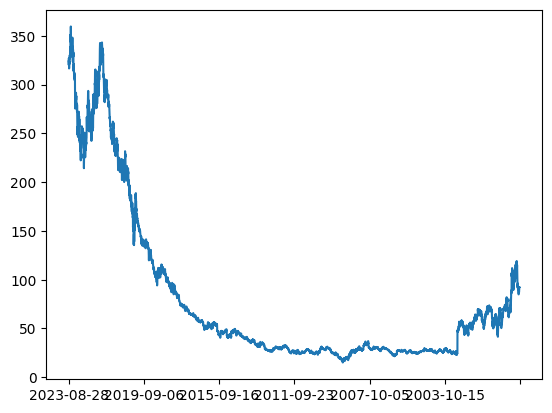

In [ ]:
%matplotlib inline
#plot one of the columns
pd.to_numeric(data1["4. close"]).plot()

<hr>

In [ ]:
#NOTE: THE BELOW EXERCISES HAVE NO ANSWERS INCLUDED
#LEFT AS AN EXERCISE FOR THE READER :)

### <font color="red">Exercise 1: Get Google Data from Google

Create a variable called `goog` to store Google stock price. Slice the data so that it only looks at the time period from 1 Jan 2016 to 1 June 2017.


### <font color="red">Exercise 2

For your `goog` data between 1 Jan 2016 and 1 June 2017:

* Find the average trading volume
* Find the days which exceed twice its average trading volume (should be 14)

### <font color="red">Exercise 3

For the Google data set:

* Make a new column called "Prev Close", and shift the close data by 1 downwards, i.e. today's "Prev Close" is what was in yesterday's "Close". There's a `.shift()` function you can use for this.
* Add a new column showing the % difference between the current day's open and the previous day's close.
* Group the % difference by integer percentages, and show the counts of these.

For this last one, take a look at the `groupby` command.

### <font color="red">Exercise 4

* Plot the closing prices for AAPL, MSFT, and GOOG in the same graph, normalising for their different scales in a sensible manner.

### <font color="red">Exercise 5: Make your own stock analysis generator

For this final exercise, generate some interesting insight from a basket of stocks, that creates an Excel file automatically for you. Also, have it export a couple of graphs that you can plonk into your PowerPoint presentations!

In [1]:
import pandas as pd

#what if i had 2 datasets and I wanted to track differences?
sunshine = pd.read_csv('sample_data/sunshine-duration-monthly-mean-daily-duration.csv', index_col="month")
temperature = pd.read_csv('sample_data/surface-air-temperature-monthly-mean.csv', index_col="month")


sunshine1990 = sunshine.loc["1990-01":"1990-12", :]
temp1990 = temperature.loc["1990-01":"1990-12", :]

sunshine1991 = sunshine.loc["1991-01":"1991-12", :]
temp1991 = temperature.loc["1991-01":"1991-12", :]

year1990 = sunshine1990.copy()
year1990.loc[:,"mean_temp"] = temp1990["mean_temp"]
year1991 = sunshine1991.copy()
year1991.loc[:,"mean_temp"] = temp1991["mean_temp"]

data = year1990.append(year1991).T.copy()
#data
data.pct_change(axis='columns')

<ipython-input-1-8ca0c6e5c196>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = year1990.append(year1991).T.copy()


month,1990-01,1990-02,1990-03,1990-04,1990-05,1990-06,1990-07,1990-08,1990-09,1990-10,...,1991-03,1991-04,1991-05,1991-06,1991-07,1991-08,1991-09,1991-10,1991-11,1991-12
mean_sunshine_hrs,NaN,0.679245,-0.067416,-0.240964,0.031746,-0.030769,-0.063492,-0.016949,-0.120690,0.156863,...,0.014286,-0.183099,-0.12069,0.392157,-0.056338,-0.208955,-0.226415,0.02439,-0.166667,-0.142857
mean_temp,NaN,0.053435,0.021739,0.010638,0.003509,-0.010490,-0.028269,0.018182,-0.028571,0.011029,...,0.025830,-0.003597,0.00000,0.032491,-0.003497,-0.010526,-0.024823,0.00000,-0.043636,-0.026616


In [2]:
sunshine = sunshine1990.copy()
sunshine.index=range(1,13)
sunshine.columns = ["mean1990"]

sunshine1991.index=range(1,13)
sunshine1991.columns = ["mean1991"]
sunshine = sunshine.T.append(sunshine1991.T).T
#sunshine

sunshine["difference"] = sunshine["mean1990"] - sunshine["mean1991"]
sunshine

<ipython-input-2-0bbf907da9aa>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sunshine = sunshine.T.append(sunshine1991.T).T


,mean1990,mean1991,difference
1,5.3,5.6,-0.3
2,8.9,7.0,1.9
3,8.3,7.1,1.2
4,6.3,5.8,0.5
5,6.5,5.1,1.4
6,6.3,7.1,-0.8
7,5.9,6.7,-0.8
8,5.8,5.3,0.5
9,5.1,4.1,1.0
10,5.9,4.2,1.7


In [8]:
year1991

,mean_sunshine_hrs,mean_temp
month,,
1991-01,5.6,26.7
1991-02,7.0,27.1
1991-03,7.1,27.8
1991-04,5.8,27.7
1991-05,5.1,27.7
1991-06,7.1,28.6
1991-07,6.7,28.5
1991-08,5.3,28.2
1991-09,4.1,27.5


In [9]:
df = pd.DataFrame({'2016': [1769950, 30586265],'2015': [1500923, 40912316],
'2014': [1371819, 41403351]},index=['GOOG', 'APPL'])
df

,2016,2015,2014
GOOG,1769950,1500923,1371819
APPL,30586265,40912316,41403351
